# Preview
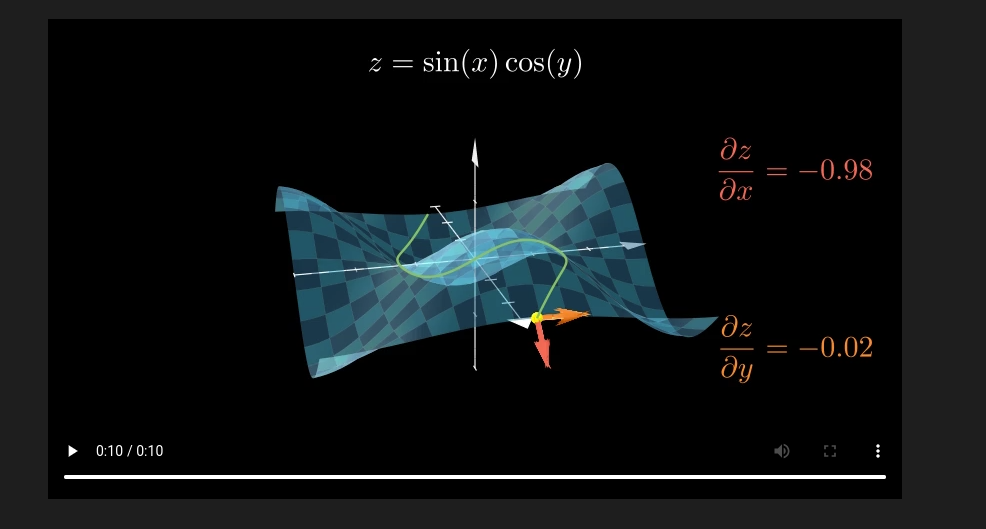

In [ ]:
from manim import *
import numpy as np

class SurfacePointFollowCamera(ThreeDScene):
    def construct(self):
        # 3D Axes
        axes = ThreeDAxes(x_range=[-3,3,1], y_range=[-3,3,1], z_range=[-2,2,1])
        self.add(axes)

        # Surface
        def surface_func(x, y):
            return np.sin(x)*np.cos(y)

        surface = Surface(
            lambda u,v: np.array([u,v,surface_func(u,v)]),
            u_range=[-3,3], v_range=[-3,3],
            resolution=(15,15),
            checkerboard_colors=[BLUE_D, BLUE_E],
            fill_opacity=0.5,
            stroke_opacity=0.2
        )
        self.add(surface)

        # Path function
        def path_func(t):
            x = t
            y = np.sin(t)
            z = surface_func(x,y)
            return np.array([x, y, z])

        t_tracker = ValueTracker(-3)
        moving_dot = Dot3D(color=YELLOW).move_to(path_func(t_tracker.get_value()))

        path = always_redraw(lambda: ParametricFunction(
            lambda tau: path_func(tau),
            t_range=[-3, t_tracker.get_value()],
            color=GREEN
        ))

        # Tangents
        def tangent_vectors():
            x, y, z = path_func(t_tracker.get_value())
            dz_dx = np.cos(x)*np.cos(y)
            dz_dy = -np.sin(x)*np.sin(y)
            tangent_x = np.array([1,0,dz_dx])
            tangent_y = np.array([0,1,dz_dy])
            tangent_x = tangent_x / np.linalg.norm(tangent_x) * 0.7
            tangent_y = tangent_y / np.linalg.norm(tangent_y) * 0.7
            arrow_x = Arrow3D(start=[x,y,z], end=[x,y,z]+tangent_x, color=RED, stroke_width=4)
            arrow_y = Arrow3D(start=[x,y,z], end=[x,y,z]+tangent_y, color=ORANGE, stroke_width=4)
            return VGroup(arrow_x, arrow_y)

        tangent_group = always_redraw(tangent_vectors)

        # Fixed HUD labels
        eq_label = MathTex(r"z = \sin(x)\cos(y)").to_edge(UP)
        grad_x_label = always_redraw(lambda: MathTex(
            r"\frac{\partial z}{\partial x} = " +
            f"{np.cos(path_func(t_tracker.get_value())[0])*np.cos(path_func(t_tracker.get_value())[1]):.2f}",
            color=RED
        ).to_edge(RIGHT).shift(UP*1.5))
        grad_y_label = always_redraw(lambda: MathTex(
            r"\frac{\partial z}{\partial y} = " +
            f"{-np.sin(path_func(t_tracker.get_value())[0])*np.sin(path_func(t_tracker.get_value())[1]):.2f}",
            color=ORANGE
        ).to_edge(RIGHT).shift(DOWN*1.5))
        self.add_fixed_in_frame_mobjects(eq_label, grad_x_label, grad_y_label)

        # Add objects
        self.add(moving_dot, path, tangent_group)

        # Initial camera orientation
        self.set_camera_orientation(phi=70*DEGREES, theta=-60*DEGREES)

        # ---------------- Animate dot with camera ----------------
        def update_dot(dot):
            dot.move_to(path_func(t_tracker.get_value()))

        self.play(
            t_tracker.animate.set_value(3),
            UpdateFromFunc(moving_dot, update_dot),
            run_time=8,
            rate_func=linear
        )

        # ---------------- Move camera manually during animation ----------------
        # Instead of updater, you can call move_camera once per key frame if needed
        # For smooth effect, keep camera phi/theta fixed and only adjust position
        self.move_camera(phi=70*DEGREES, theta=-60*DEGREES, added_anims=[], run_time=0)

        self.wait(2)





%manim -ql -v WARNING SurfacePointFollowCamera

Manim Community v0.19.0

Animation 0: _MethodAnimation(ValueTracker), etc.:  37%|███▋      | 44/120 [00:48<01:27,  1.15s/it]